In [1]:
import pandas as pd
import numpy as np

# Ruta del archivo original
file_path = "export.csv"

# Leer el archivo con UTF-16 y tabulaciones como separador
df = pd.read_csv(file_path, encoding="utf-16", sep="\t", quoting=3, engine="python")

# Eliminar comillas dobles de todas las celdas
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

# Convertir espacios vacíos, tabulaciones y caracteres invisibles en NaN
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() in ["", "\t", "\n", "\r", "\xa0"] else x)

# Guardar el archivo limpio en UTF-8
file_cleaned_path = "export_limpio.csv"
df.to_csv(file_cleaned_path, encoding="utf-8", index=False)

print(f"Archivo limpio guardado como: {file_cleaned_path}")

# Mostrar cuántos valores nulos hay ahora
print(df.isna().sum())




/var/folders/09/3xcrkv750gd3cy0wyd9255rm0000gn/T/ipykernel_4874/868689602.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
/var/folders/09/3xcrkv750gd3cy0wyd9255rm0000gn/T/ipykernel_4874/868689602.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() in ["", "\t", "\n", "\r", "\xa0"] else x)


Archivo limpio guardado como: export_limpio.csv
sequence_id                                 0
razon_social                                0
nombre_comercial                        10929
sector                                      0
actividad_2                                10
                                        ...  
fee_id                                      3
terms_and_conditions_acceptance_date    11827
expires_on                              11827
created_date                                0
modified_date                               0
Length: 74, dtype: int64


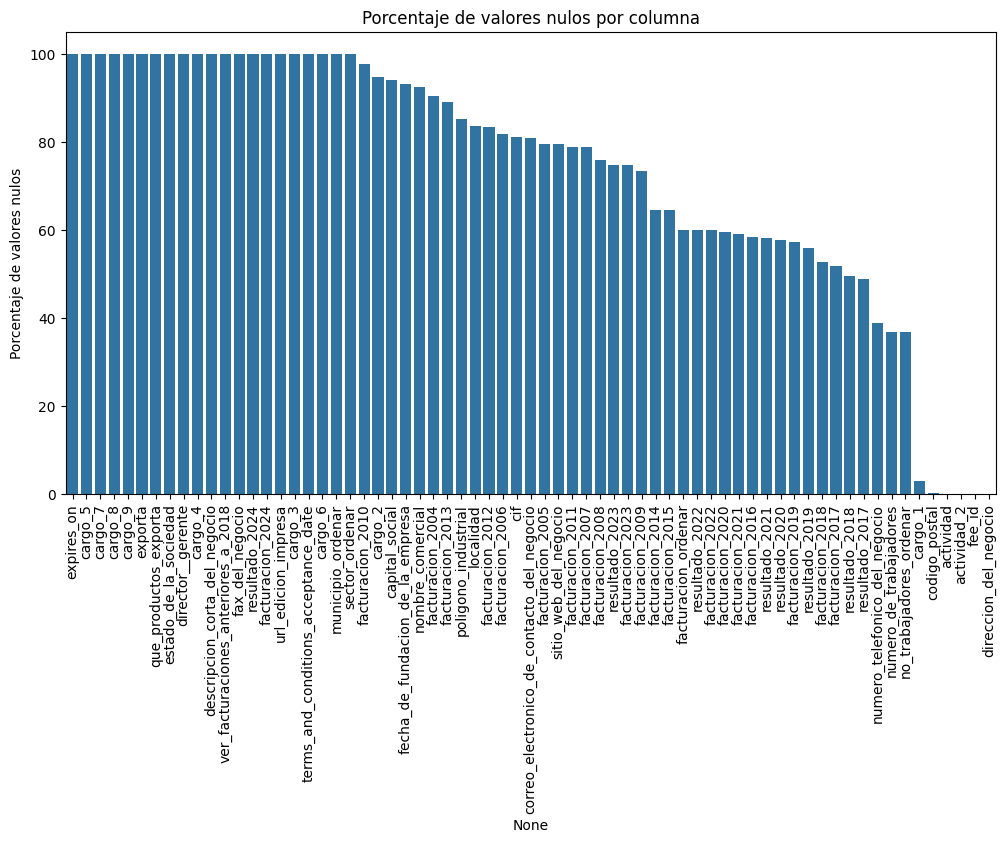

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el porcentaje de valores nulos
missing_percentage = df.isnull().mean() * 100

# Filtrar solo las columnas con valores nulos y ordenarlas
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Graficar los valores nulos
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para mejor visualización
plt.ylabel("Porcentaje de valores nulos")
plt.title("Porcentaje de valores nulos por columna")
plt.show()


In [4]:
# Mostrar todos los nombres de las columnas para verificar
print(df.columns.tolist())

df.columns = df.columns.str.strip()  # Elimina espacios extra en nombres de columnas

# Ahora accedemos de nuevo
print(df["correo_electronico_de_contacto_del_negocio"].notna().sum())



['sequence_id', 'razon_social', 'nombre_comercial', 'sector', 'actividad_2', 'actividad', 'cif', 'direccion_del_negocio', 'codigo_postal', 'localidad', 'municipio', 'sitio_web_del_negocio', 'fax_del_negocio', 'numero_telefonico_del_negocio', 'descripcion_corta_del_negocio', 'fecha_de_fundacion_de_la_empresa', 'correo_electronico_de_contacto_del_negocio', 'poligono_industrial', 'facturacion_2004', 'facturacion_2005', 'facturacion_2006', 'facturacion_2007', 'facturacion_2008', 'facturacion_2009', 'facturacion_2010', 'facturacion_2011', 'facturacion_2012', 'facturacion_2013', 'facturacion_2014', 'facturacion_2015', 'facturacion_2016', 'facturacion_2017', 'resultado_2017', 'facturacion_2018', 'resultado_2018', 'facturacion_2019', 'resultado_2019', 'facturacion_2020', 'resultado_2020', 'facturacion_2021', 'resultado_2021', 'director__gerente', 'cargo_1', 'cargo_2', 'cargo_3', 'cargo_4', 'cargo_5', 'cargo_6', 'cargo_7', 'cargo_8', 'cargo_9', 'numero_de_trabajadores', 'exporta', 'que_producto

# Correos electronicos vacíos.

In [11]:
# Ver cuántos valores únicos hay realmente en la columna de correo
num_correos_unicos = df["correo_electronico_de_contacto_del_negocio"].nunique()
num_correos_totales = df["correo_electronico_de_contacto_del_negocio"].notna().sum()

print(f"Total de correos electrónicos NO vacíos: {num_correos_totales}")
print(f"Correos electrónicos ÚNICOS: {num_correos_unicos}")

# Verificar si hay correos duplicados
correos_duplicados = df["correo_electronico_de_contacto_del_negocio"].duplicated().sum()
print(f"Correos electrónicos duplicados: {correos_duplicados}")


Total de correos electrónicos NO vacíos: 2247
Correos electrónicos ÚNICOS: 2211
Correos electrónicos duplicados: 9615


# Números de telefono

In [12]:
# Contar cuántos teléfonos hay en total (NO vacíos)
num_telefonos_totales = df["numero_telefonico_del_negocio"].notna().sum()

# Contar cuántos teléfonos son únicos
num_telefonos_unicos = df["numero_telefonico_del_negocio"].nunique()

# Verificar cuántos teléfonos están duplicados
telefonos_duplicados = df["numero_telefonico_del_negocio"].duplicated().sum()

# Mostrar los resultados
print(f"Total de teléfonos NO vacíos: {num_telefonos_totales}")
print(f"Teléfonos ÚNICOS: {num_telefonos_unicos}")
print(f"Teléfonos duplicados: {telefonos_duplicados}")


Total de teléfonos NO vacíos: 7234
Teléfonos ÚNICOS: 6332
Teléfonos duplicados: 5494


# Porcentaje de nulos 

In [13]:
import pandas as pd

# Calcular valores nulos y porcentaje
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear DataFrame con la información
missing_data = pd.DataFrame({"Valores Faltantes": missing_values, "Porcentaje (%)": missing_percentage})
missing_data = missing_data[missing_data["Valores Faltantes"] > 0]  # Filtrar solo columnas con nulos

# Mostrar la tabla ordenada por porcentaje de nulos
print(missing_data.sort_values(by="Porcentaje (%)", ascending=False))


                       Valores Faltantes  Porcentaje (%)
expires_on                         11827      100.000000
cargo_5                            11827      100.000000
cargo_7                            11827      100.000000
cargo_8                            11827      100.000000
cargo_9                            11827      100.000000
...                                  ...             ...
codigo_postal                         18        0.152194
actividad                             10        0.084552
actividad_2                           10        0.084552
fee_id                                 3        0.025366
direccion_del_negocio                  1        0.008455

[67 rows x 2 columns]


In [24]:
import pandas as pd

# 📌 Cargar el archivo (ajusta según tu caso)
df = pd.read_csv("export_limpio.csv")  # Si es un CSV

# Calcular valores nulos y porcentaje
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear DataFrame con la información
missing_data = pd.DataFrame({
    "Valores Faltantes": missing_values,
    "Porcentaje (%)": missing_percentage
})

# Filtrar solo columnas con valores nulos
missing_data = missing_data[missing_data["Valores Faltantes"] > 0]

# Ordenar por porcentaje de valores nulos
missing_data = missing_data.sort_values(by="Porcentaje (%)", ascending=False)

# 📌 Guardar el informe en un archivo Excel
archivo_salida = "valores_nulos.xlsx"
missing_data.to_excel(archivo_salida, index=True)

print(f"✅ Informe generado con éxito: {archivo_salida}")


✅ Informe generado con éxito: valores_nulos.xlsx


/var/folders/09/3xcrkv750gd3cy0wyd9255rm0000gn/T/ipykernel_4874/257102659.py:4: DtypeWarning: Columns (55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("export_limpio.csv")  # Si es un CSV


# Empresas sin 

In [30]:
import pandas as pd

# 📌 Cargar los datos desde el archivo CSV
df = pd.read_csv("export_limpio.csv") 

# 📌 Filtrar empresas SIN correo electrónico pero CON número de teléfono
sin_correo_con_telefono = df[
    df["correo_electronico_de_contacto_del_negocio"].isna() & 
    df["numero_telefonico_del_negocio"].notna()
]

# 📌 Seleccionar solo las columnas necesarias
columnas_deseadas = ["sequence_id", "razon_social", "nombre_comercial", "sector", "numero_telefonico_del_negocio", "correo_electronico_de_contacto_del_negocio"]
sin_correo_con_telefono = sin_correo_con_telefono[columnas_deseadas]

# 📌 Guardar en archivo Excel
sin_correo_con_telefono.to_excel("sinCorreoElectronicoConNumero.xlsx", index=False)

print("✅ Archivo Excel generado con éxito:")
print("  - sinCorreoElectronico.xlsx (Empresas sin correo pero con teléfono)")


/var/folders/09/3xcrkv750gd3cy0wyd9255rm0000gn/T/ipykernel_4874/951673544.py:4: DtypeWarning: Columns (55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("export_limpio.csv")


✅ Archivo Excel generado con éxito:
  - sinCorreoElectronico.xlsx (Empresas sin correo pero con teléfono)


In [31]:
import pandas as pd

# 📌 Cargar los datos desde el archivo CSV
df = pd.read_csv("export_limpio.csv") 

# 📌 Asegurar que los valores vacíos o espacios en blanco se conviertan en NaN
df["numero_telefonico_del_negocio"] = df["numero_telefonico_del_negocio"].replace(["", " "], pd.NA)
df["correo_electronico_de_contacto_del_negocio"] = df["correo_electronico_de_contacto_del_negocio"].replace(["", " "], pd.NA)

# 📌 Filtrar empresas SIN número de teléfono Y SIN correo electrónico
sin_telefono_correo = df[
    df["numero_telefonico_del_negocio"].isna() & 
    df["correo_electronico_de_contacto_del_negocio"].isna()
]

# 📌 Seleccionar solo las columnas necesarias, incluyendo teléfono y correo para verificación
columnas_deseadas = [
    "sequence_id", 
    "razon_social", 
    "nombre_comercial", 
    "sector", 
    "numero_telefonico_del_negocio", 
    "correo_electronico_de_contacto_del_negocio"
]
sin_telefono_correo = sin_telefono_correo[columnas_deseadas]

# 📌 Guardar en archivo Excel
sin_telefono_correo.to_excel("SinNumeroNiCorreo.xlsx", index=False)

print("✅ Archivo Excel generado con éxito:")
print("  - SinNumeroCorreo.xlsx (Empresas sin teléfono ni correo)")


✅ Archivo Excel generado con éxito:
  - SinNumeroCorreo.xlsx (Empresas sin teléfono ni correo)


/var/folders/09/3xcrkv750gd3cy0wyd9255rm0000gn/T/ipykernel_4874/752130150.py:4: DtypeWarning: Columns (55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("export_limpio.csv")


In [32]:
import pandas as pd

# 📌 Cargar los datos desde el archivo CSV
df = pd.read_csv("export_limpio.csv") 

# 📌 Asegurar que los valores vacíos o espacios en blanco se conviertan en NaN
df["correo_electronico_de_contacto_del_negocio"] = df["correo_electronico_de_contacto_del_negocio"].replace(["", " "], pd.NA)

# 📌 Filtrar empresas que SÍ tienen correo electrónico
con_correo = df[df["correo_electronico_de_contacto_del_negocio"].notna()]

# 📌 Seleccionar solo las columnas necesarias
columnas_deseadas = [
    "sequence_id", 
    "razon_social", 
    "nombre_comercial", 
    "sector", 
    "numero_telefonico_del_negocio", 
    "correo_electronico_de_contacto_del_negocio"
]
con_correo = con_correo[columnas_deseadas]

# 📌 Guardar en archivo Excel
con_correo.to_excel("ConCorreoElectronico.xlsx", index=False)

print("✅ Archivo Excel generado con éxito:")
print("  - ConCorreoElectronico.xlsx (Empresas que sí tienen correo electrónico)")


✅ Archivo Excel generado con éxito:
  - ConCorreoElectronico.xlsx (Empresas que sí tienen correo electrónico)


/var/folders/09/3xcrkv750gd3cy0wyd9255rm0000gn/T/ipykernel_4874/2434313700.py:4: DtypeWarning: Columns (55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("export_limpio.csv")
